## read results 

In [48]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [50]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from hockey.visualization.pygame.animate_hockey_game import read_and_merge_dataframes

## Helper function(s)

In [51]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


## Read!

In [52]:
from hockey.core.folder_manager import FolderManager
folder_mgr = FolderManager(experiments_root_dir = "/Users/luisd/luis-simulation", experiment_name = "discrete_5x5_2")


In [53]:
folder_mgr.model_dir

'/Users/luisd/luis-simulation/discrete_5x5_2/model'

In [54]:
model_df = read_and_merge_dataframes(folder_mgr.model_dir, prefix_fname="", verbose=True)
agents_df = read_and_merge_dataframes(folder_mgr.agents_dir, prefix_fname="", verbose=True)

From '/Users/luisd/luis-simulation/discrete_5x5_2/model' I read ['/Users/luisd/luis-simulation/discrete_5x5_2/model/discrete_5x5_2_model_run_1.pd', '/Users/luisd/luis-simulation/discrete_5x5_2/model/discrete_5x5_2_model_run_2.pd']
From '/Users/luisd/luis-simulation/discrete_5x5_2/agents' I read ['/Users/luisd/luis-simulation/discrete_5x5_2/agents/discrete_5x5_2_agents_run_1.pd', '/Users/luisd/luis-simulation/discrete_5x5_2/agents/discrete_5x5_2_agents_run_2.pd']


In [55]:
# root_dir = folder_mgr.agents_dir
# # root_dir = "/Users/luisd/luis-simulation/speed1_discrete5x5_vector"
# # root_dir = "/Users/luisd/luis-simulation/speed1_discrete15x15_vector"
# # root_dir = "/Users/luisd/luis-simulation/speed1_discrete4x4"

# model_df = read_and_merge_dataframes(root_dir, prefix_fname="model", verbose=True)
# agents_df = read_and_merge_dataframes(root_dir, prefix_fname="agents", verbose=True)

In [56]:
print("Columns on 'model' df: %s" % list(model_df))
print("Columns on 'agents' df: %s" % list(agents_df))

Columns on 'model' df: ['Unnamed: 0', 'goals', 'puck_is_taken', 'shots', 'steps', 'timestamp']
Columns on 'agents' df: ['Step', 'AgentID', 'timestamp', 'pos_x', 'pos_y', 'speed_x', 'speed_y', 'speed_magnitude', 'topuck_x', 'topuck_y', 'angle2puck', 'last_action', 'have_puck', 'can_see_puck', 'can_reach_puck']


In [57]:
# half-ice rink
model_df = model_df.sort_values(by=('timestamp'))
model_df.index = np.arange(model_df.shape[0])
# agents
agents_df = agents_df.sort_values(by=('timestamp'))
agents_df.index = np.arange(agents_df.shape[0])

In [58]:
seconds_between_events = round(model_df.iloc[2]["timestamp"] - model_df.iloc[1]["timestamp"], 5)
seconds_between_events

0.050000000000000003

In [59]:
# max_tick = model_df["Unnamed: 0"].max()

In [60]:
max_timestamp_in_seconds = model_df["timestamp"].max()
max_timestamp_in_minutes = max_timestamp_in_seconds//60
print("Have %.2f seconds of simulation, ~%d minutes" % (max_timestamp_in_seconds, max_timestamp_in_minutes))

Have 1320.10 seconds of simulation, ~22 minutes


## Agents

In [61]:
agents_df

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
0,0,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.05,4,4,-0.000000e+00,-0.000000e+00,0.0,-4.0,-4.0,"Angle in radians = 3.927 (Pi/2: 1.571, Pi:3.14...",NaN,False,False,False
1,0,puck_fb261499-9879-4ec3-a68b-c8371565d1ff,0.05,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.10,3,4,-1.000000e+00,-0.000000e+00,1.0,-3.0,-4.0,"Angle in radians = 0.927 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
3,1,puck_fb261499-9879-4ec3-a68b-c8371565d1ff,0.10,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.15,3,3,-1.836970e-16,-1.000000e+00,1.0,-3.0,-3.0,"Angle in radians = 5.498 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
5,2,puck_fb261499-9879-4ec3-a68b-c8371565d1ff,0.15,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.20,2,3,-1.000000e+00,5.665539e-16,1.0,-2.0,-3.0,"Angle in radians = 0.983 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
7,3,puck_fb261499-9879-4ec3-a68b-c8371565d1ff,0.20,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.25,2,2,-1.071875e-15,-1.000000e+00,1.0,-2.0,-2.0,"Angle in radians = 5.498 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
9,4,puck_fb261499-9879-4ec3-a68b-c8371565d1ff,0.25,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# agents_df[
#     agents_df['last_action'].str.contains("Grab", na=False) & 
#     (agents_df['last_action'].str.contains("FAILED", na=False) == False)
# ]


[last action = 'nan'] puck in (0.00, 1.00), agent in (4.00, 4.00), moving towards (-0.0000, -0.0000)


(-10, 14)

(-9, 14)

Text(0.5,1,'[red=agent speed, blue=v2puck] \n Angle 2 puck = Angle in radians = 0.785 (Pi/2: 1.571, Pi:3.142, 3/2*Pi:4.712), \n Can see puck = True, Can reach puck = False')

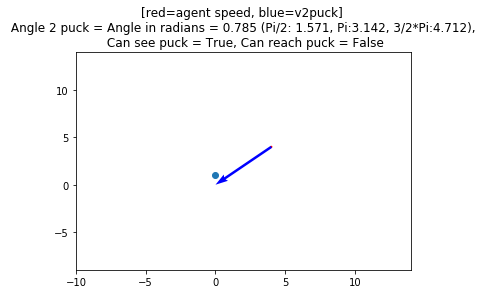

In [63]:
# For the `can_see_puck` case, debug with root_dir = "/Users/luisd/luis-simulation/fetchpuck_minmoves5", ag_idx = 24
ag_idx = 3382
x = agents_df.loc[ag_idx]["pos_x"] # [agents_df["timestamp"] == 0.65]
y = agents_df.loc[ag_idx]["pos_y"]
sp_x = agents_df.loc[ag_idx]["speed_x"]
sp_y = agents_df.loc[ag_idx]["speed_y"]
topuck_x = agents_df.loc[ag_idx]["topuck_x"]
topuck_y = agents_df.loc[ag_idx]["topuck_y"]
angletopuck = agents_df.loc[ag_idx]["angle2puck"]
lastaction = agents_df.loc[ag_idx]["last_action"]
# plt.quiver([0, 0, 0], [0, 0, 0], [1, -2, 4], [1, 2, -7], angles='xy', scale_units='xy', scale=1)
plt.quiver([x, x], [y, y], [sp_x, topuck_x], [sp_y, topuck_y], angles='xy', scale_units='xy', scale=1, color=['red', 'blue'])
puck_x = agents_df.loc[ag_idx - 1]["pos_x"]
puck_y = agents_df.loc[ag_idx - 1]["pos_y"]
plt.plot([(puck_x)], [(puck_y)],'o')
# plt.plot([(1,2, 3)], [(3,5, 9)],'o')
print("[last action = '%s'] puck in (%.2f, %.2f), agent in (%.2f, %.2f), moving towards (%.4f, %.4f)" % (lastaction, puck_x, puck_y, x, y, sp_x, sp_y))
min_x = min([x, x - sp_x, puck_x]) - 10
max_x = max([x, x + sp_x, puck_x]) + 10
min_y = min([y, y - sp_y, puck_y]) - 10
max_y = max([y, y + sp_y, puck_y]) + 10
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
can_see_puck = agents_df.loc[ag_idx]["can_see_puck"]
can_reach_puck = agents_df.loc[ag_idx]["can_reach_puck"]
plt.title("[red=agent speed, blue=v2puck] \n Angle 2 puck = %s, \n Can see puck = %s, Can reach puck = %s" % (angletopuck, can_see_puck, can_reach_puck))
plt.show()

In [64]:
agents_df[["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y",  "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,can_see_puck,can_reach_puck
0,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.05,4,4,-0.000000e+00,-0.000000e+00,False,False
1,puck_fb261499-9879-4ec3-a68b-c8371565d1ff,0.05,0,0,0.000000e+00,0.000000e+00,NaN,NaN
2,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.10,3,4,-1.000000e+00,-0.000000e+00,True,False
3,puck_fb261499-9879-4ec3-a68b-c8371565d1ff,0.10,0,0,0.000000e+00,0.000000e+00,NaN,NaN
4,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.15,3,3,-1.836970e-16,-1.000000e+00,True,False
5,puck_fb261499-9879-4ec3-a68b-c8371565d1ff,0.15,0,0,0.000000e+00,0.000000e+00,NaN,NaN
6,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.20,2,3,-1.000000e+00,5.665539e-16,True,False
7,puck_fb261499-9879-4ec3-a68b-c8371565d1ff,0.20,0,0,0.000000e+00,0.000000e+00,NaN,NaN
8,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.25,2,2,-1.071875e-15,-1.000000e+00,True,False
9,puck_fb261499-9879-4ec3-a68b-c8371565d1ff,0.25,0,0,0.000000e+00,0.000000e+00,NaN,NaN


## Puck movement

### Is it moving at all?

In [65]:
all_puck_movs = agents_df[agents_df['AgentID'].str.contains("puck_", na=False) == True]
# all_puck_movs

Text(0.5,0,'Step')

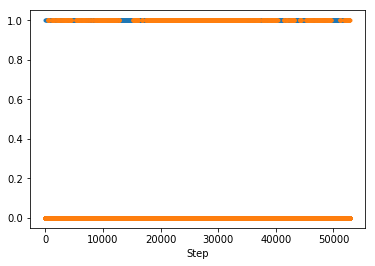

In [66]:
# all_puck_movs.plot(x='Step', y=['pos_x', 'pos_y'], style='.')
puck_x, = plt.plot(all_puck_movs['pos_x'], '.')
puck_y, = plt.plot(all_puck_movs['pos_y'], '.')
plt.xlabel("Step")
# plt.xlim([71775, 72270])

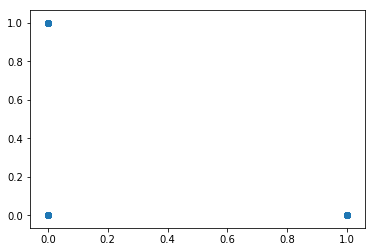

In [67]:
plt.scatter(x=all_puck_movs['pos_x'], y=all_puck_movs['pos_y'])

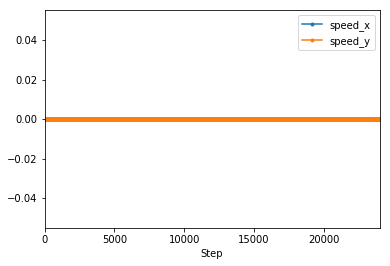

In [68]:
all_puck_movs.plot(x='Step', y=['speed_x', 'speed_y'], style='.-')

### All events done by agents (ie, NOT puck)

In [69]:
all_players_actions = agents_df[agents_df['AgentID'].str.contains("puck_", na=False) == False]
all_players_actions = all_players_actions.sort_values(by=('timestamp'))
all_players_actions.index = np.arange(all_players_actions.shape[0])

In [70]:
# all_players_actions[
#             all_players_actions.timestamp.between(left=74, right=75)]

In [71]:
# all 'shots' and 'passes' 
# all_players_actions[
#     (all_players_actions['last_action'].str.contains("send puck", na=False) == True) & 
#     (all_players_actions['last_action'].str.contains("[FAILED]", na=False) == False)
# ]

### All failed actions:

In [72]:
# agents_df[agents_df['last_action'].str.contains("FAILED", na=False)]

### All successful GRABs:

In [73]:
df_succ_grabs1 = all_players_actions[
    all_players_actions['have_puck'] == True
]
num_episodes1 = len(df_succ_grabs1)
print("The agent played %d episodes" % (num_episodes1))

The agent played 2802 episodes


In [74]:
idx_first_episode = df_succ_grabs1.index[0]
df_succ_grabs1.index[:10]

Int64Index([15, 56, 97, 138, 179, 198, 217, 236, 255, 274], dtype='int64')

In [75]:
all_players_actions[idx_first_episode - 2:idx_first_episode + 2][["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y", "last_action", "have_puck", "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,last_action,have_puck,can_see_puck,can_reach_puck
13,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.70,2,1,-2.848232e-15,-1.000000e+00,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
14,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.75,2,0,-2.848232e-15,1.000000e+00,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
15,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.80,1,0,-1.000000e+00,2.542071e-15,"Move => speed = 1.00 feet/sec, direction = Ang...",True,True,True
16,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.85,4,4,-0.000000e+00,-0.000000e+00,NaN,False,True,False


In [76]:
df_episode1 = all_players_actions[:idx_first_episode][["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y", "last_action", "have_puck", "can_see_puck", "can_reach_puck"]]

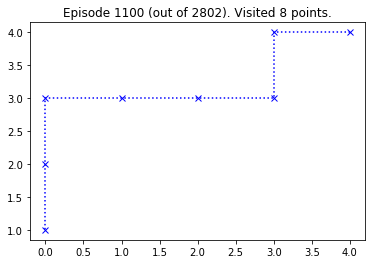

In [98]:
episode_number = 1100 # 15385
an_episode = all_players_actions[df_succ_grabs1.index[episode_number - 1] + 1:df_succ_grabs1.index[episode_number] + 1]
# an_episode = df_episode1
# an_episode = all_players_actions
# an_episode[:10]["pos_x"]
# an_episode[:10]["pos_y"]
_ = plt.plot(an_episode["pos_x"], an_episode["pos_y"], 'bx:')
# _ = plt.plot(all_players_actions["pos_x"], all_players_actions["pos_y"], 'bx:')
_ = plt.title("Episode %d (out of %d). Visited %d points." % (episode_number, num_episodes1, len(an_episode)))
plt.show()


In [78]:
an_episode

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
618,618,forward_2de60a56-2e71-4602-b499-cedf4a0223df,30.95,4,4,-0.000000e+00,-0.000000e+00,0.0,-4.0,-4.0,"Angle in radians = 0.785 (Pi/2: 1.571, Pi:3.14...",NaN,False,True,False
619,619,forward_2de60a56-2e71-4602-b499-cedf4a0223df,31.00,3,4,-1.000000e+00,-1.224647e-16,1.0,-3.0,-4.0,"Angle in radians = 0.927 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
620,620,forward_2de60a56-2e71-4602-b499-cedf4a0223df,31.05,2,4,-1.000000e+00,-1.224647e-16,1.0,-2.0,-4.0,"Angle in radians = 1.107 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
621,621,forward_2de60a56-2e71-4602-b499-cedf4a0223df,31.10,1,4,-1.000000e+00,-1.224647e-16,1.0,-1.0,-4.0,"Angle in radians = 1.326 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
622,622,forward_2de60a56-2e71-4602-b499-cedf4a0223df,31.15,0,4,1.000000e+00,-1.224647e-16,1.0,0.0,-4.0,Angle in radians: 3*Pi/2 (= 4.7124),"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
623,623,forward_2de60a56-2e71-4602-b499-cedf4a0223df,31.20,0,3,6.123234e-17,-1.000000e+00,1.0,0.0,-3.0,"Angle in radians = 0.000 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
624,624,forward_2de60a56-2e71-4602-b499-cedf4a0223df,31.25,0,2,1.836970e-16,-1.000000e+00,1.0,0.0,-2.0,"Angle in radians = 0.000 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
625,625,forward_2de60a56-2e71-4602-b499-cedf4a0223df,31.30,0,1,1.836970e-16,-1.000000e+00,1.0,0.0,0.0,Angle in radians: Pi / 2 (= 1.5708),"Move => speed = 1.00 feet/sec, direction = Ang...",True,True,True


In [79]:
all_players_actions[df_succ_grabs1.index[episode_number - 1] + 1:df_succ_grabs1.index[episode_number]][["timestamp", "pos_x", "pos_y", "speed_x", "speed_y"]]

,timestamp,pos_x,pos_y,speed_x,speed_y
618,30.95,4,4,-0.000000e+00,-0.000000e+00
619,31.00,3,4,-1.000000e+00,-1.224647e-16
620,31.05,2,4,-1.000000e+00,-1.224647e-16
621,31.10,1,4,-1.000000e+00,-1.224647e-16
622,31.15,0,4,1.000000e+00,-1.224647e-16
623,31.20,0,3,6.123234e-17,-1.000000e+00
624,31.25,0,2,1.836970e-16,-1.000000e+00


In [80]:
# all_players_actions[df_succ_grabs1.index[episode_number - 1] + 1:df_succ_grabs1.index[episode_number]][["timestamp", "pos_x", "pos_y", "last_action"]]
ll = all_players_actions[df_succ_grabs1.index[episode_number - 1] + 1:df_succ_grabs1.index[episode_number]]["last_action"].tolist()
ll

[nan,
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: Pi (= 3.1416), so I am going Vec2d(-1.0, 1.2246467991473532e-16)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: Pi (= 3.1416), so I am going Vec2d(-1.0, 1.2246467991473532e-16)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: Pi (= 3.1416), so I am going Vec2d(-1.0, 1.2246467991473532e-16)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: Pi (= 3.1416), so I am going Vec2d(-1.0, 1.2246467991473532e-16)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: Pi / 2 (= 1.5708), so I am going Vec2d(6.123233995736766e-17, 1.0)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: 3*Pi/2 (= 4.7124), so I am going Vec2d(-1.8369701987210297e-16, -1.0)']

In [81]:
# # df_succ_grabs = all_players_actions[
# #     all_players_actions['last_action'].str.contains("Grab", na=False) & 
# #     (all_players_actions['last_action'].str.contains("FAILED", na=False) == False)
# # ]
# df_succ_grabs = agents_df[
#     agents_df['last_action'].str.contains("Grab", na=False) & 
#     (agents_df['last_action'].str.contains("FAILED", na=False) == False)
# ]
df_succ_grabs = agents_df[
    agents_df['have_puck'] == True
]
num_episodes = len(df_succ_grabs)
print("The agent played %d episodes" % (num_episodes))


The agent played 2802 episodes


In [82]:
df_succ_grabs.index[:10]

Int64Index([30, 112, 194, 276, 358, 396, 434, 472, 510, 548], dtype='int64')

In [83]:
# all_players_actions.iloc[2755:2763]
agents_df.iloc[6596:7000][["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y", "last_action", "have_puck", "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,last_action,have_puck,can_see_puck,can_reach_puck
6596,puck_1c34e346-6d27-4595-87f4-75895f753565,164.95,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
6597,forward_b66e4b4f-24f7-482d-b8e8-289af4191d84,164.95,3,2,-1.000000e+00,1.010643e-15,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
6598,puck_1c34e346-6d27-4595-87f4-75895f753565,165.00,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
6599,forward_b66e4b4f-24f7-482d-b8e8-289af4191d84,165.00,3,3,9.494108e-16,1.000000e+00,"Move => speed = 1.00 feet/sec, direction = Ang...",False,False,False
6600,forward_b66e4b4f-24f7-482d-b8e8-289af4191d84,165.05,3,4,9.494108e-16,-1.000000e+00,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
6601,puck_1c34e346-6d27-4595-87f4-75895f753565,165.05,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
6602,forward_b66e4b4f-24f7-482d-b8e8-289af4191d84,165.10,2,4,-1.000000e+00,-7.657137e-16,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
6603,puck_1c34e346-6d27-4595-87f4-75895f753565,165.10,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
6604,forward_b66e4b4f-24f7-482d-b8e8-289af4191d84,165.15,2,3,-3.828569e-16,-1.000000e+00,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
6605,puck_1c34e346-6d27-4595-87f4-75895f753565,165.15,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN


2400


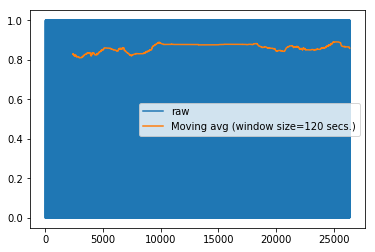

In [84]:
speeds = all_players_actions["speed_magnitude"].tolist()
raw, = plt.plot(speeds, '-', label="raw")
window_size_in_secs = 120
window_size = int(round(window_size_in_secs / seconds_between_events))
print(window_size)

r_mean = running_mean(speeds, N = window_size)
rm, = plt.plot(range(window_size - 1, len(speeds)), r_mean, label='Moving avg (window size=%d secs.)' % (window_size_in_secs))
plt.legend(handles=[raw, rm])
# plt.xlim([2.5e6, 2.5e6 + 3000])

In [85]:
print(len(all_players_actions.index))
print(len(all_players_actions.index.unique()))

26402
26402


In [86]:
all_players_actions.index[0:10]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [87]:
all_players_actions.index.max()

26401

In [88]:
all_players_actions[:3]

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
0,0,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.05,4,4,-0.000000e+00,-0.0,0.0,-4.0,-4.0,"Angle in radians = 3.927 (Pi/2: 1.571, Pi:3.14...",NaN,False,False,False
1,1,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.10,3,4,-1.000000e+00,-0.0,1.0,-3.0,-4.0,"Angle in radians = 0.927 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
2,2,forward_2de60a56-2e71-4602-b499-cedf4a0223df,0.15,3,3,-1.836970e-16,-1.0,1.0,-3.0,-3.0,"Angle in radians = 5.498 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False


(1000, 1600)

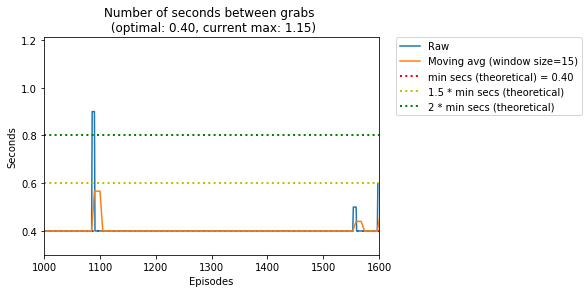

In [94]:
# max_theoretical, = plt.axhline(y=9,linewidth=4, color='r', label='max secs (thoretical)')
# for experiment with ONLY 10 ft/sec, 13 secs is the optimal
speed_of_agent = 1
# num_min_moves = (1 + 1 + 14 + 13)/speed_of_agent # ((1 + 1 + 3)/speed_of_agent)
num_min_moves = (8)/speed_of_agent # ((1 + 1 + 3)/speed_of_agent)
num_min_secs = num_min_moves * seconds_between_events # 130/speed_of_agent
two_time_num_min_secs = 2 * num_min_secs
one_and_half_time_num_min_secs = 1.5 * num_min_secs
num_opt_plot = plt.axhline(
    y=num_min_secs,
    linewidth=2, 
    color='r', 
    label='min secs (theoretical) = %.2f' % (num_min_secs),
    linestyle=':')
# plt.axhline(y=num_min_secs * 1.5,linewidth=2, color='r', label='max secs (thoretical)')

timestamps_grabs = agents_df.iloc[df_succ_grabs.index]["timestamp"].tolist()
seconds_between = [(time2 - time1) for time1, time2 in zip(timestamps_grabs, timestamps_grabs[1:])]
seconds_between_plot, = plt.plot(seconds_between, label='Raw')
window_size = 15
r_mean = running_mean(seconds_between, N = window_size)
moving_avg_plot, = plt.plot(range(window_size - 1, len(seconds_between)), r_mean, label='Moving avg (window size=%d)' % (window_size))
two_num_opt_plot = plt.axhline(y=two_time_num_min_secs,linewidth=2, color='g', label='2 * min secs (theoretical)', linestyle=':')
one_and_half_num_opt_plot = plt.axhline(y=one_and_half_time_num_min_secs,linewidth=2, color='y', label='1.5 * min secs (theoretical)', linestyle=':')
_ = plt.legend(handles=[seconds_between_plot, moving_avg_plot, num_opt_plot, one_and_half_num_opt_plot, two_num_opt_plot], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


_ = plt.xlabel("Episodes")
_= plt.ylabel("Seconds")
_ = plt.title("Number of seconds between grabs \n (optimal: %.2f, current max: %.2f)" % (num_min_secs, np.amax(r_mean)))
# display_how_many_episodes = 575
# print("Zooming in to last %d episodes" % (display_how_many_episodes))
# _ = plt.xlim([num_episodes - display_how_many_episodes, num_episodes])
plt.xlim([1000,1600])
# plt.ylim([0.75 * num_min_secs, 200])
_ = plt.ylim([0.75 * num_min_secs, 1.05 * np.amax(r_mean)]) # 1.10 * np.amax(seconds_between)]) 


In [90]:
import math
bucket_in_minutes = 1
events_with_puck = []
for curr_minute in range(0, int(math.ceil(max_timestamp_in_minutes)), bucket_in_minutes):
    min_second = curr_minute * 60 # (curr_minute - bucket_in_minutes) * 60
    max_second = min_second + bucket_in_minutes * 60 # curr_minute * (bucket_in_minutes * 60)
    num_events = len(
        all_players_actions[
            all_players_actions.timestamp.between(left=min_second, right=max_second) & \
            all_players_actions['have_puck'] == True
        ]
    )
    events_with_puck.append(num_events)
    # print("second: %d, num events: %d" % (curr_second, num_events))
    # len(all_players_actions[all_players_actions['timestamp'] <= curr_second))

22 minutes, so there are 23 buckets of 1' long each


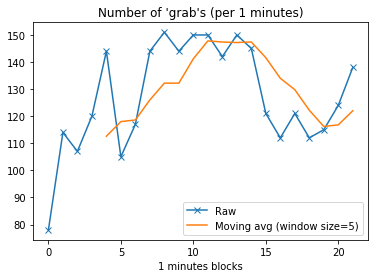

In [91]:
print("%d minutes, so there are %d buckets of %d' long each" % (max_timestamp_in_minutes, max_timestamp_in_minutes//bucket_in_minutes + 1, bucket_in_minutes))
events_with_puck_plot, = plt.plot(events_with_puck, 'x-', label="Raw")
window_size = 5
r_mean = running_mean(events_with_puck, N = window_size)
moving_avg_plot, = plt.plot(range(window_size - 1, len(events_with_puck)), r_mean, label='Moving avg (window size=%d)' % (window_size))
_ = plt.legend(handles=[events_with_puck_plot, moving_avg_plot])

_ = plt.xlabel("%d minutes blocks" % bucket_in_minutes)
# plt.ylabel("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
_ = plt.title("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
# plt.xlim([len(events_with_puck) - 100, len(events_with_puck)])
# print("Only plotting from block %d to %d" % (len(events_with_puck) - 100, len(events_with_puck)))

In [92]:
# import pickle
# from hockey.behaviour.core.action import HockeyAction
# from hockey.behaviour.core.bitstring_environment_state import BitstringEnvironmentState

# brain_file = "/Users/luisd/luis-simulation/models/brainfetchpuck_minmoves2.bin"
# model = pickle.load(open(brain_file, 'rb'))
# print("%d rules read." % (len(model)))
# best_fitness_rule_and_fitness = (None, -10)
# for rule in model:
# #     if rule.fitness > .5:
# #         print(rule.condition, '=>', rule.action, ' [%.5f, experience: %d]' % (rule.fitness, rule.experience))
#     if  rule.action == HockeyAction.GRAB_PUCK:
#         print(rule.condition, '=>', rule.action, ' [%.5f, experience: %d]' % (rule.fitness, rule.experience))
#         if best_fitness_rule_and_fitness[1] < rule.fitness:
#             best_fitness_rule_and_fitness = (rule, rule.fitness)
# best_rule = best_fitness_rule_and_fitness[0]
# print("Best rule for 'GRAB_PUCK' is ")
# print(best_rule.condition, '=>', best_rule.action, ' [%.5f, experience: %d]' % (best_rule.fitness, best_rule.experience))
# print(BitstringEnvironmentState.explain_condition(condition=best_fitness_rule_and_fitness[0].condition))

# SCRATCH PAPER DOWN HERE